In [1]:
import os
import collections
from math import log2
import numpy as np
import matplotlib.pyplot as plt
from tf.app import use

In [2]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

In [3]:
REPORT_DIR = os.path.expanduser("~/github/clariah/wp6-daghregisters/postocr/daghregister/004")

In [4]:
A = use("clariah/wp6-daghregisters:clone", checkout="clone", hoist=globals())

This is Text-Fabric 9.2.0
Api reference : https://annotation.github.io/text-fabric/tf/cheatsheet.html

13 features found and 0 ignored


In [5]:
CORPUS = tuple(word for w in range(1, F.otype.maxSlot + 1) if not (word := F.letters.v(w)).isdigit())

In [6]:
def showWordFreqs(corpus):
    freqs = collections.Counter()
    for word in corpus:
        freqs[word] += 1
        
    values = np.fromiter((log2(f) for f in freqs.values()), float)
    (frequency, bins) = np.histogram(values, bins=100)
    fig, ax = plt.subplots()
    ax.hist(values, bins=100)
    # ax.set(xticks=np.arange(-10, 20))
    plt.gca().set(title="Word frequencies", ylabel='Frequency')
    plt.show()

    nHapax = sum(1 for f in freqs.values() if f == 1)
    print(f"{len(corpus)} words of which {nHapax} are hapax")

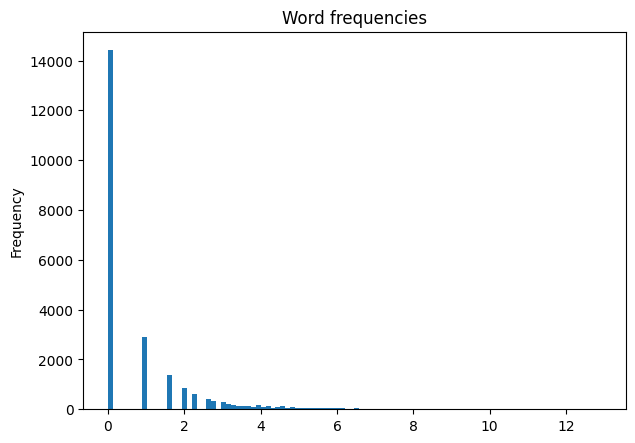

221451 words of which 14437 are hapax


In [7]:
showWordFreqs(CORPUS)

In [8]:
wordCount = collections.Counter()
pairCount = collections.Counter()

wordPrev = CORPUS[0]
wordCount[wordPrev] += 1

for word in CORPUS[1:]:
    wordCount[word] += 1
    pairCount[(wordPrev, word)] += 1
    wordPrev = word

In [9]:
N = len(CORPUS)

mutualInfo = {}

for ((word1, word2), freq) in pairCount.items():
    word1P = wordCount[word1] / N
    word2P = wordCount[word2] / N
    word12P = freq / N
    mutualInfo[(word1, word2)] = log2(word12P / (word1P * word2P))

In [10]:
miValues = np.fromiter(mutualInfo.values(), float)
(frequency, bins) = np.histogram(miValues, bins=100)

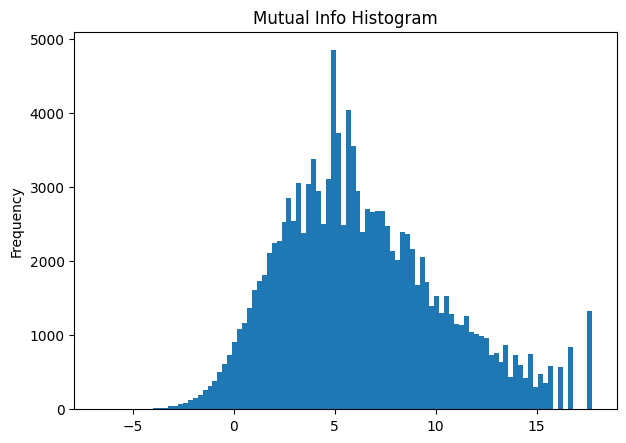

In [11]:
fig, ax = plt.subplots()
ax.hist(miValues, bins=100)
plt.gca().set(title='Mutual Info Histogram', ylabel='Frequency')
plt.show()

There is a peak of word pairs with a very high mutual information. Let's examine that. We put in a few more 
ticks on the x-axis.

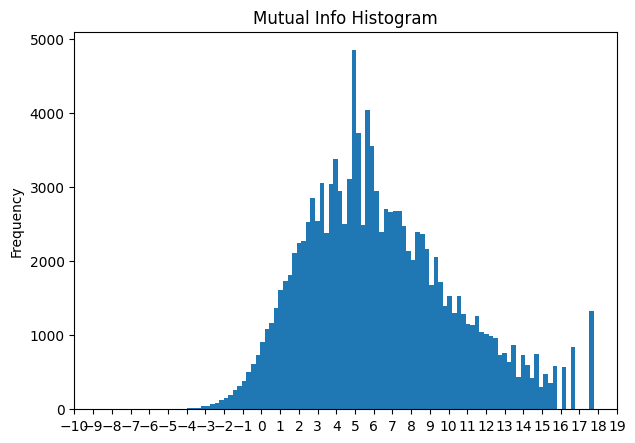

In [12]:
fig, ax = plt.subplots()
ax.hist(miValues, bins=100)
ax.set(xticks=np.arange(-10, 20))
plt.gca().set(title='Mutual Info Histogram', ylabel='Frequency')
plt.show()

So let's look at the pairs for which the mutual info is more than 17

In [13]:
hiMi = sorted(x[0] for x in mutualInfo.items() if x[1] > 17)
len(hiMi)

1333

In [14]:
for (word1, word2) in hiMi[0:100]:
    print(f"{word1:>30} {word2}")

                            %0 fif
                           'Ed bevoelen
               'Neederlanderen verwonderden
                            '^ Samloot
                          '^^^ ^^9
                         -2yde patole
                  -onecnicheyt veroorsaeckende
                          .ach tinge
                        .cours noortwaerts
                           .de Mallabaerse
                          .die nuswack
                    .oprechten omganck
                          .tot beeler
                        /'1741 :13:10
                      /'286456 gemel
                       /*54175 jgeoost
                           /ia gesecundeert
                     13054:8:2 Vertreckeu
                     14/bIasen borax
                    14188^^/32 tholas
                         164iT BRIEF
                         207^2 r^len
                         37Vio ®'
                        3eltr8 atThandich
                           47S fS
                        

Ah, probably the mutual info is high because the frequencies of the words involved are low. 
Let's have a look.

In [15]:
for (word1, word2) in hiMi[0:100]:
    word1Freq = wordCount[word1]
    word2Freq = wordCount[word2]
    print(f"{word1:>30} {word1Freq:>3} {word2Freq:<3} {word2}")

                            %0   1 1   fif
                           'Ed   1 1   bevoelen
               'Neederlanderen   1 1   verwonderden
                            '^   1 1   Samloot
                          '^^^   1 1   ^^9
                         -2yde   1 1   patole
                  -onecnicheyt   1 1   veroorsaeckende
                          .ach   1 1   tinge
                        .cours   1 1   noortwaerts
                           .de   1 1   Mallabaerse
                          .die   1 1   nuswack
                    .oprechten   1 1   omganck
                          .tot   1 1   beeler
                        /'1741   1 1   :13:10
                      /'286456   1 1   gemel
                       /*54175   1 1   jgeoost
                           /ia   1 1   gesecundeert
                     13054:8:2   1 1   Vertreckeu
                     14/bIasen   1 1   borax
                    14188^^/32   1 1   tholas
                         164iT   1 1   BRIEF
   

Indeed.

Let's repeat the exercise but exclude words that occur infrequently.

In [16]:
def showDist(frequencyThreshold):
    N = F.otype.maxSlot

    mutualInfo = {}

    for ((word1, word2), freq) in pairCount.items():
        word1C = wordCount[word1]
        if word1C < frequencyThreshold:
            continue
        word2C = wordCount[word2]
        if word1C < frequencyThreshold:
            continue
        word1P = word1C / N
        word2P = word2C / N
        word12P = freq / N
        
        mutualInfo[(word1, word2)] = log2(word12P / (word1P * word2P))
    miValues = np.fromiter(mutualInfo.values(), float)
    (frequency, bins) = np.histogram(miValues, bins=100)
    fig, ax = plt.subplots()
    ax.hist(miValues, bins=100)
    ax.set(xticks=np.arange(-10, 20))
    plt.gca().set(title=f'Mutual Info Histogram (word freq >= {frequencyThreshold})', ylabel='Frequency')
    plt.show()

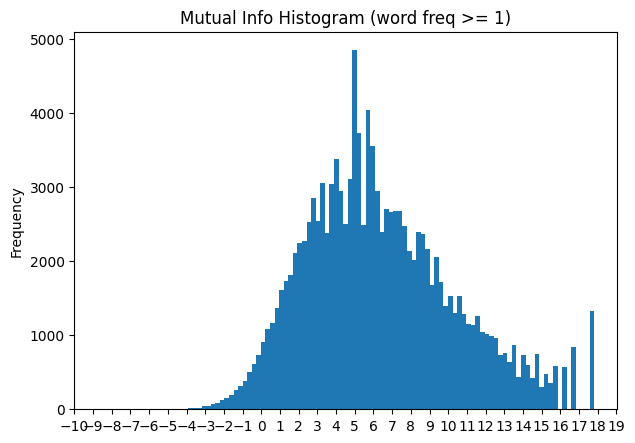

In [17]:
showDist(1)

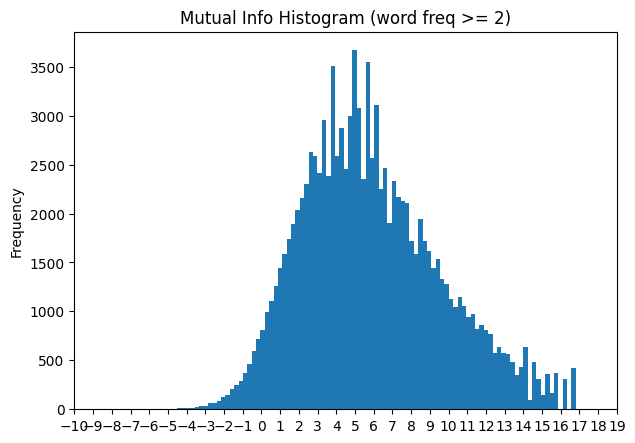

In [18]:
showDist(2)

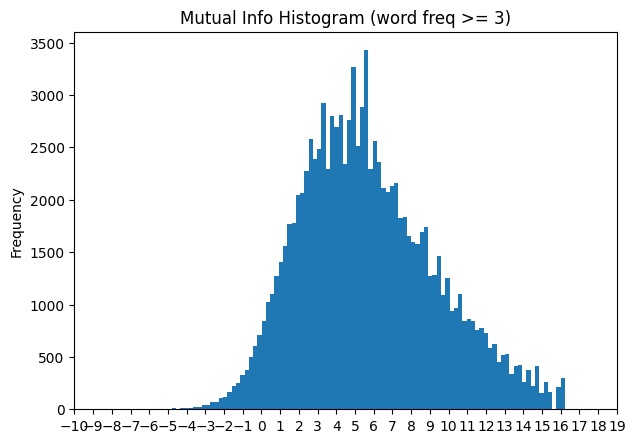

In [19]:
showDist(3)

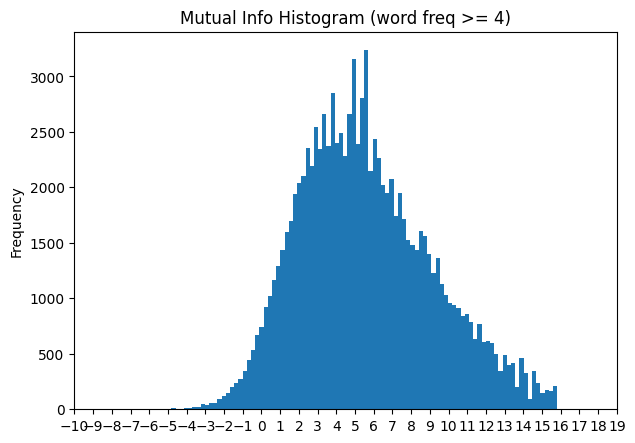

In [20]:
showDist(4)